In [1]:
# !pip install -U iminizinc

In [2]:
# Import the necessary libraries
from tqdm import tqdm
from utils import import_instances, plot_solution, output_solution
import time
%reload_ext iminizinc

<IPython.core.display.Javascript object>

MiniZinc to FlatZinc converter, version 2.5.5, build 273041792
Copyright (C) 2014-2021 Monash University, NICTA, Data61


## Data Import

In [3]:
# Get all instances from text files
instances = import_instances('input/instances/')

['ins-1.txt', 'ins-2.txt', 'ins-3.txt', 'ins-4.txt', 'ins-5.txt', 'ins-6.txt', 'ins-7.txt', 'ins-8.txt', 'ins-9.txt', 'ins-10.txt', 'ins-11.txt', 'ins-12.txt', 'ins-13.txt', 'ins-14.txt', 'ins-15.txt', 'ins-16.txt', 'ins-17.txt', 'ins-18.txt', 'ins-19.txt', 'ins-20.txt', 'ins-21.txt', 'ins-22.txt', 'ins-23.txt', 'ins-24.txt', 'ins-25.txt', 'ins-26.txt', 'ins-27.txt', 'ins-28.txt', 'ins-29.txt', 'ins-30.txt', 'ins-31.txt', 'ins-32.txt', 'ins-33.txt', 'ins-34.txt', 'ins-35.txt', 'ins-36.txt', 'ins-37.txt', 'ins-38.txt', 'ins-39.txt', 'ins-40.txt']


## Constraint Programming

In [4]:
def get_variables(NUMBER):
    # Get the number of blocks
    BLOCKS = []
    for n in range(int(instances[NUMBER][1])):
        BLOCKS.append(f'Block {n}')
    
    # Get block lengths and heights
    BLOCK_WIDTHS = []
    BLOCK_HEIGHTS = []

    for value in instances[NUMBER][2:]:
        width, height = value.split(' ')
        BLOCK_WIDTHS.append(int(width))
        BLOCK_HEIGHTS.append(int(height))
    
    # Get the maximum width and height
    MAX_WIDTH = int(instances[NUMBER][0])
    
    TOTAL_AREA = 0
    for n in range(int(instances[NUMBER][1])):
        TOTAL_AREA += BLOCK_WIDTHS[n] * BLOCK_HEIGHTS[n]
    MAX_HEIGHT = TOTAL_AREA // MAX_WIDTH
    
    return BLOCKS, BLOCK_WIDTHS, BLOCK_HEIGHTS, MAX_WIDTH, MAX_HEIGHT

In [5]:
# Show the solution found
def show_solution(start_x, start_y, file=None):    
    circuits = []
    for i in range(len(BLOCKS)):
        circuits.append([BLOCK_WIDTHS[i], BLOCK_HEIGHTS[i], start_x[i], start_y[i]])

    plot_solution(MAX_WIDTH, MAX_HEIGHT, len(BLOCKS), circuits, file)

In [6]:
%%mzn_model model

include "globals.mzn";

enum BLOCKS;
array[BLOCKS] of int: BLOCK_WIDTHS;
array[BLOCKS] of int: BLOCK_HEIGHTS;

int: MAX_WIDTH;
int: MAX_HEIGHT;
    
% Constraints to find x-coordinates
array[BLOCKS] of var 0..MAX_WIDTH: start_x;

constraint cumulative(start_x, BLOCK_WIDTHS, BLOCK_HEIGHTS, MAX_HEIGHT);

constraint forall(b in BLOCKS)(start_x[b] + BLOCK_WIDTHS[b] <= MAX_WIDTH);

% Constraints to find y-coordinates
array[BLOCKS] of var 0..MAX_HEIGHT: start_y;

constraint cumulative(start_y, BLOCK_HEIGHTS, BLOCK_WIDTHS, MAX_WIDTH);

constraint forall(b in BLOCKS)(start_y[b] + BLOCK_HEIGHTS[b] <= MAX_HEIGHT);

% Symmetry breaking
constraint diffn(start_x, start_y, BLOCK_WIDTHS, BLOCK_HEIGHTS);

solve :: seq_search([int_search(start_x, dom_w_deg, indomain_split), 
                     int_search(start_y, dom_w_deg, indomain_split)])satisfy;

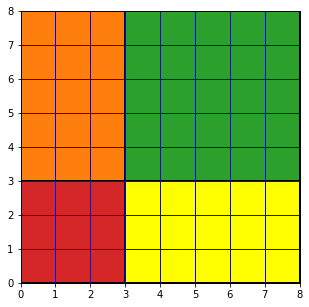

In [7]:
# Show a sample solution
NUMBER = 0
BLOCKS, BLOCK_WIDTHS, BLOCK_HEIGHTS, MAX_WIDTH, MAX_HEIGHT = get_variables(NUMBER)

timeout = time.time() + 60*5
%minizinc model --time-limit 300000 -m bind

if time.time() >= timeout:
    print(f'Instance-{NUMBER+1} Fail: Timeout')
else:
    show_solution(start_x, start_y)

## Data Output

In [8]:
for n in tqdm(range(len(instances))):
    NUMBER = n
    BLOCKS, BLOCK_WIDTHS, BLOCK_HEIGHTS, MAX_WIDTH, MAX_HEIGHT = get_variables(NUMBER)
    
    timeout = time.time() + 60*5
    %minizinc model --time-limit 300000 -m bind
    
    if time.time() >= timeout:
        print(f'Instance-{NUMBER+1} Fail: Timeout')
    else:
        output_solution(instances[NUMBER], start_x, start_y, MAX_HEIGHT, f'output/CP/solutions/out-{NUMBER+1}.txt')
        show_solution(start_x, start_y, f'output/CP/images/out-{NUMBER+1}.png')

 40%|████████████████████████████████▊                                                 | 16/40 [06:52<38:34, 96.45s/it]

Solver output:
No solution has been found
No solutions found
Instance-16 Fail: Timeout


 55%|████████████████████████████████████████████▌                                    | 22/40 [14:21<35:05, 116.97s/it]

Solver output:
No solution has been found
No solutions found
Instance-22 Fail: Timeout


 62%|██████████████████████████████████████████████████▋                              | 25/40 [19:39<33:21, 133.45s/it]

Solver output:
No solution has been found
No solutions found
Instance-25 Fail: Timeout


 65%|████████████████████████████████████████████████████▋                            | 26/40 [24:42<42:59, 184.28s/it]

Solver output:
No solution has been found
No solutions found
Instance-26 Fail: Timeout


 75%|████████████████████████████████████████████████████████████▊                    | 30/40 [30:03<22:58, 137.81s/it]

Solver output:
No solution has been found
No solutions found
Instance-30 Fail: Timeout


 80%|████████████████████████████████████████████████████████████████▊                | 32/40 [36:41<23:46, 178.32s/it]

Solver output:
No solution has been found
No solutions found
Instance-32 Fail: Timeout


 85%|████████████████████████████████████████████████████████████████████▊            | 34/40 [41:50<17:55, 179.29s/it]

Solver output:
No solution has been found
No solutions found
Instance-34 Fail: Timeout


 88%|██████████████████████████████████████████████████████████████████████▉          | 35/40 [46:56<18:07, 217.50s/it]

Solver output:
No solution has been found
No solutions found
Instance-35 Fail: Timeout


 90%|████████████████████████████████████████████████████████████████████████▉        | 36/40 [51:58<16:11, 242.82s/it]

Solver output:
No solution has been found
No solutions found
Instance-36 Fail: Timeout


 92%|██████████████████████████████████████████████████████████████████████████▉      | 37/40 [57:00<13:01, 260.57s/it]

Solver output:
No solution has been found
No solutions found
Instance-37 Fail: Timeout


 95%|███████████████████████████████████████████████████████████████████████████    | 38/40 [1:02:02<09:05, 272.97s/it]

Solver output:
No solution has been found
No solutions found
Instance-38 Fail: Timeout


100%|███████████████████████████████████████████████████████████████████████████████| 40/40 [1:08:07<00:00, 102.19s/it]

Solver output:
No solution has been found
No solutions found
Instance-40 Fail: Timeout
